In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('/content/drive/MyDrive/datasets/mcdonalds.csv')

In [3]:
print(df)

     yummy convenient spicy fattening greasy fast cheap tasty expensive  \
0       No        Yes    No       Yes     No  Yes   Yes    No       Yes   
1      Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes   
2       No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes   
3      Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No   
4       No        Yes    No       Yes    Yes  Yes   Yes    No        No   
...    ...        ...   ...       ...    ...  ...   ...   ...       ...   
1448    No        Yes    No       Yes    Yes   No    No    No       Yes   
1449   Yes        Yes    No       Yes     No   No   Yes   Yes        No   
1450   Yes        Yes    No       Yes     No  Yes    No   Yes       Yes   
1451   Yes        Yes    No        No     No  Yes   Yes   Yes        No   
1452    No        Yes    No       Yes    Yes   No    No    No       Yes   

     healthy disgusting          Like  Age      VisitFrequency  Gender  
0         No         No   

In [4]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [6]:
df.shape

(1453, 15)

In [7]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [8]:
MD_x = df
MD_x = (MD_x == "Yes").astype(int)
col_means = np.round(np.mean(MD_x, axis=0), 2)
print(col_means)

yummy             0.55
convenient        0.91
spicy             0.09
fattening         0.87
greasy            0.53
fast              0.90
cheap             0.60
tasty             0.64
expensive         0.36
healthy           0.20
disgusting        0.24
Like              0.00
Age               0.00
VisitFrequency    0.00
Gender            0.00
dtype: float64


In [9]:
from sklearn.decomposition import PCA

MD_pca = PCA()
MD_pca.fit(MD_x)

eigenvalues = MD_pca.explained_variance_

variance_ratio = MD_pca.explained_variance_ratio_

cumulative_variance_ratio = np.cumsum(variance_ratio)

summary_df = pd.DataFrame({
    "Standard deviation": np.sqrt(eigenvalues),
    "Proportion of Variance": variance_ratio,
    "Cumulative Proportion": cumulative_variance_ratio
}, index=np.arange(1, len(eigenvalues) + 1))

print(summary_df)

    Standard deviation  Proportion of Variance  Cumulative Proportion
1             0.757050                0.299447               0.299447
2             0.607456                0.192797               0.492244
3             0.504619                0.133045               0.625290
4             0.398799                0.083096               0.708386
5             0.337405                0.059481               0.767866
6             0.310275                0.050300               0.818166
7             0.289697                0.043849               0.862015
8             0.275122                0.039548               0.901563
9             0.265251                0.036761               0.938323
10            0.248842                0.032353               0.970677
11            0.236903                0.029323               1.000000
12            0.000000                0.000000               1.000000
13            0.000000                0.000000               1.000000
14            0.0000

In [10]:
MD_pca = PCA()
MD_pca.fit(MD_x)

np.set_printoptions(precision=1)

print("Standard deviations:")
print(np.sqrt(MD_pca.explained_variance_))
print("\nRotation (principal components):")
print(MD_pca.components_)

Standard deviations:
[0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2 0.  0.  0.  0. ]

Rotation (principal components):
[[-0.5 -0.2 -0.   0.1  0.3 -0.1 -0.3 -0.5  0.3 -0.2  0.4 -0.  -0.  -0.
  -0. ]
 [ 0.4  0.   0.  -0.  -0.1 -0.1 -0.6  0.3  0.6  0.1 -0.1  0.   0.   0.
   0. ]
 [-0.3 -0.1 -0.  -0.3 -0.8 -0.1 -0.1 -0.3  0.   0.2 -0.1  0.   0.   0.
   0. ]
 [ 0.1 -0.1  0.2 -0.4  0.3 -0.1  0.1 -0.   0.1  0.8  0.4  0.   0.   0.
   0. ]
 [-0.3  0.3  0.1 -0.1  0.4  0.1 -0.1 -0.2 -0.   0.3 -0.7  0.   0.   0.
   0. ]
 [ 0.2 -0.3 -0.4 -0.4  0.2 -0.6 -0.1 -0.1 -0.3 -0.2 -0.2  0.   0.   0.
   0. ]
 [-0.3 -0.1  0.7 -0.4  0.  -0.1 -0.   0.4 -0.1 -0.3 -0.  -0.  -0.  -0.
  -0. ]
 [ 0.  -0.1  0.4  0.6 -0.1 -0.6  0.1 -0.1  0.   0.2 -0.2 -0.  -0.  -0.
  -0. ]
 [ 0.6 -0.   0.4 -0.2 -0.   0.2  0.1 -0.6  0.1 -0.2 -0.1  0.   0.   0.
   0. ]
 [-0.1 -0.7 -0.1 -0.   0.   0.2  0.4  0.1  0.5 -0.  -0.3 -0.  -0.  -0.
  -0. ]
 [ 0.  -0.5  0.1  0.3  0.   0.3 -0.5  0.  -0.5  0.2 -0.   0.   0.   0.
   0. ]
 [ 0.   0.   0

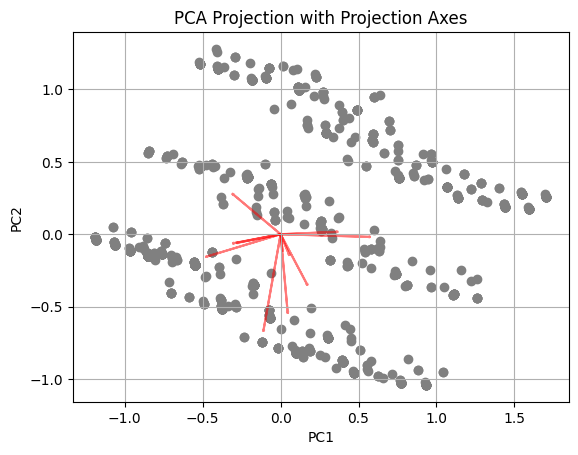

In [11]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

MD_pca = PCA()
MD_pca.fit(MD_x)
projection = MD_pca.transform(MD_x)

plt.scatter(projection[:, 0], projection[:, 1], color='grey')

for i in range(len(MD_pca.components_)):
    plt.arrow(0, 0, MD_pca.components_[i, 0], MD_pca.components_[i, 1], color='r', alpha=0.5, linewidth=1.5)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Projection with Projection Axes')
plt.grid(True)
plt.show()


In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

np.random.seed(1234)

best_k = None
best_kmeans = None
best_silhouette_score = -1

k_values = range(2, 9)

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
    kmeans.fit(MD_x)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(MD_x, labels)
    print(f"For k={k}, Silhouette Score: {silhouette_avg}")

    if silhouette_avg > best_silhouette_score:
        best_k = k
        best_kmeans = kmeans
        best_silhouette_score = silhouette_avg

print(f"\nBest K: {best_k}")

For k=2, Silhouette Score: 0.24441701827275675
For k=3, Silhouette Score: 0.23282891365502031
For k=4, Silhouette Score: 0.2580595854833568
For k=5, Silhouette Score: 0.2613379092677105
For k=6, Silhouette Score: 0.2534701619798705
For k=7, Silhouette Score: 0.28156428494916763
For k=8, Silhouette Score: 0.2961268364149829

Best K: 8


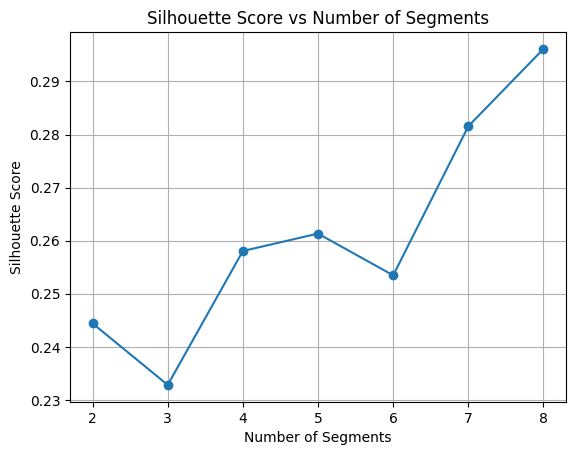

In [13]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

np.random.seed(1234)

silhouette_scores = []

k_values = range(2, 9)

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
    kmeans.fit(MD_x)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(MD_x, labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Segments')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Segments')
plt.xticks(k_values)
plt.grid(True)
plt.show()

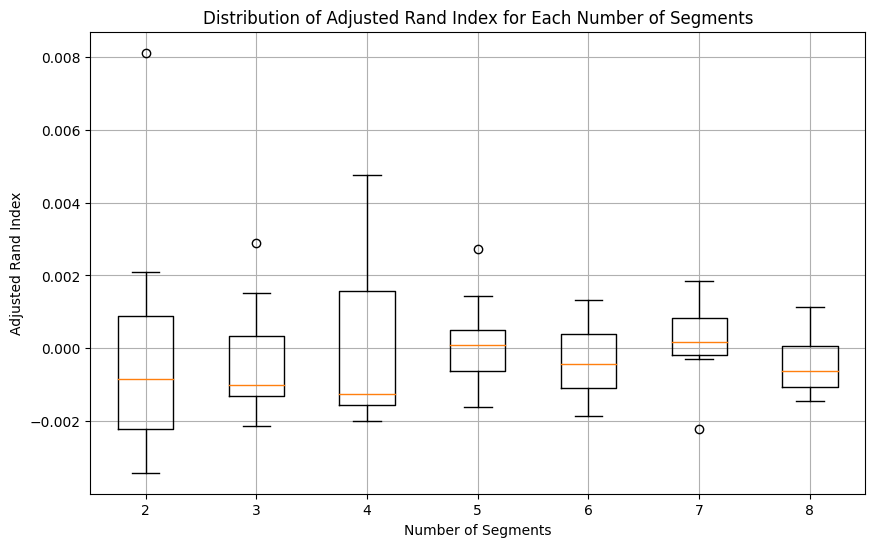

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

MD_x = MD_x.values

np.random.seed(1234)

rand_indices_dict = {k: [] for k in range(2, 9)}

nboot = 10

for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
    for _ in range(nboot):
        bootstrap_indices = np.random.choice(len(MD_x), len(MD_x), replace=True)
        bootstrap_data = MD_x[bootstrap_indices]
        kmeans.fit(bootstrap_data)
        labels = kmeans.labels_
        true_labels = kmeans.fit(MD_x).labels_
        rand_index = adjusted_rand_score(true_labels, labels)
        rand_indices_dict[k].append(rand_index)

plt.figure(figsize=(10, 6))
plt.boxplot(rand_indices_dict.values(), labels=rand_indices_dict.keys())
plt.xlabel('Number of Segments')
plt.ylabel('Adjusted Rand Index')
plt.title('Distribution of Adjusted Rand Index for Each Number of Segments')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


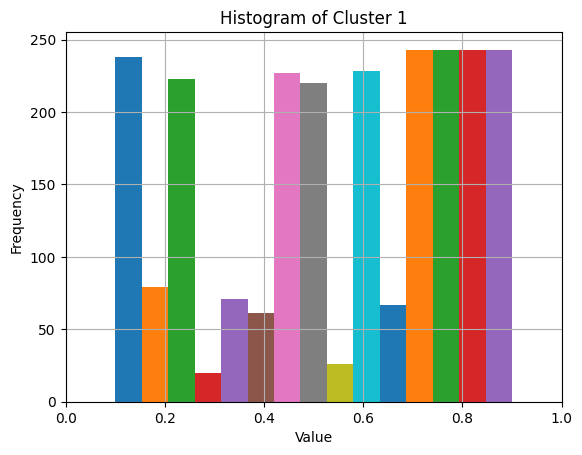

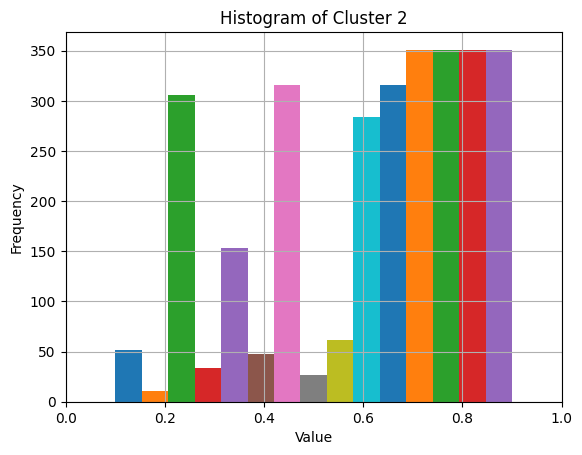

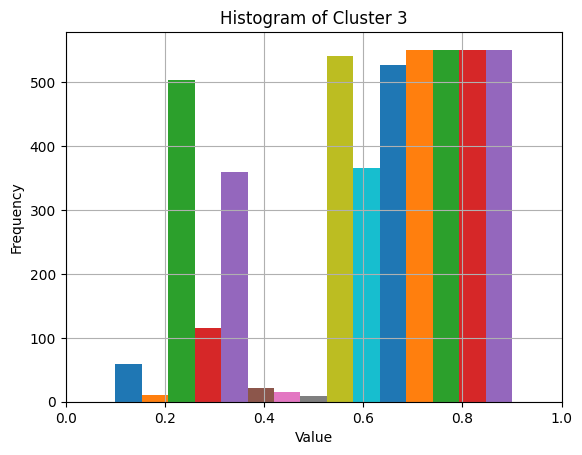

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans.fit(MD_x)

cluster_labels = kmeans.labels_

for cluster_num in [0, 1, 2]:
    cluster_indices = np.where(cluster_labels == cluster_num)[0]
    cluster_data = MD_x.iloc[cluster_indices] if isinstance(MD_x, pd.DataFrame) else MD_x[cluster_indices]

    plt.hist(cluster_data, bins=20, range=(0, 20))
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of Cluster {cluster_num + 1}')
    plt.xlim(0, 1)
    plt.grid(True)
    plt.show()


In [16]:
from sklearn.mixture import GaussianMixture

MD_x = MD_x.values if isinstance(MD_x, pd.DataFrame) else MD_x

k_range = range(2, 9)

gmm_models = {}

for k in k_range:
    gmm = GaussianMixture(n_components=k, covariance_type='full', random_state=1234)
    gmm.fit(MD_x)
    gmm_models[k] = gmm

for k, gmm in gmm_models.items():
    print(f"Number of clusters: {k}")
    print(gmm)


Number of clusters: 2
GaussianMixture(n_components=2, random_state=1234)
Number of clusters: 3
GaussianMixture(n_components=3, random_state=1234)
Number of clusters: 4
GaussianMixture(n_components=4, random_state=1234)
Number of clusters: 5
GaussianMixture(n_components=5, random_state=1234)
Number of clusters: 6
GaussianMixture(n_components=6, random_state=1234)
Number of clusters: 7
GaussianMixture(n_components=7, random_state=1234)
Number of clusters: 8
GaussianMixture(n_components=8, random_state=1234)


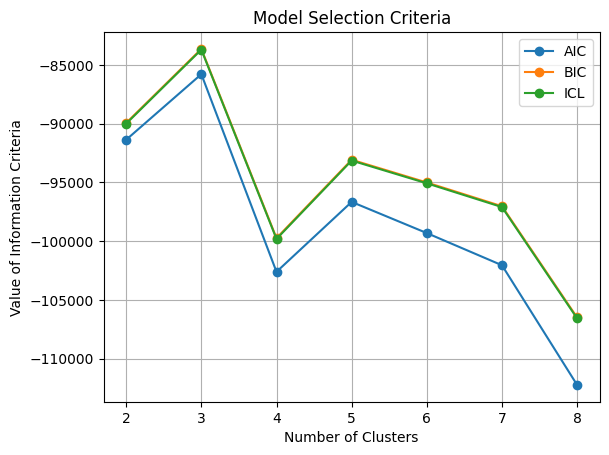

In [17]:
import matplotlib.pyplot as plt

aic_values = [gmm.aic(MD_x) for gmm in gmm_models.values()]
bic_values = [gmm.bic(MD_x) for gmm in gmm_models.values()]

log_likelihoods = [gmm.score(MD_x) for gmm in gmm_models.values()]
icl_values = [bic - 2 * ll for bic, ll in zip(bic_values, log_likelihoods)]

plt.plot(range(2, 9), aic_values, label='AIC', marker='o')
plt.plot(range(2, 9), bic_values, label='BIC', marker='o')
plt.plot(range(2, 9), icl_values, label='ICL', marker='o')

plt.xlabel('Number of Clusters')
plt.ylabel('Value of Information Criteria')
plt.title('Model Selection Criteria')
plt.legend()
plt.grid(True)
plt.show()


In [18]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import numpy as np
from collections import Counter

kmeans_model = KMeans(n_clusters=4, random_state=1234)
kmeans_model.fit(MD_x)

gmm_model_4 = GaussianMixture(n_components=4, covariance_type='full', random_state=1234)
gmm_model_4.fit(MD_x)

kmeans_clusters = kmeans_model.labels_
gmm_clusters = gmm_model_4.predict(MD_x)

contingency_table = np.zeros((4, 4), dtype=int)
for kmeans_label, gmm_label in zip(kmeans_clusters, gmm_clusters):
    contingency_table[kmeans_label, gmm_label] += 1

print("Contingency Table:")
print(contingency_table)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Contingency Table:
[[ 20 302   0 191]
 [  2 116  59 189]
 [ 90  30  14 108]
 [ 17 150   1 164]]


In [19]:
df['Like'] = pd.to_numeric(df['Like'], errors='coerce')

df['Like.n'] = 6 - df['Like']

like_counts = df['Like.n'].value_counts().sort_index()

print("Frequency of each unique value in 'Like.n':")
print(like_counts)

Frequency of each unique value in 'Like.n':
2.0     160
3.0     229
4.0     187
5.0     152
6.0     169
7.0      58
8.0      59
9.0      73
10.0     71
Name: Like.n, dtype: int64


Making a design matrix:

In [26]:
column_names = df.columns[:11]
formula_str = 'Like ~ ' + ' + '.join(column_names)
y, X = patsy.dmatrices(formula_str, data=df)

print("Design Matrix:")
print(X)

Design Matrix:
[[1. 0. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 1. 1. 0.]
 ...
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 0. 1. 0.]
 [1. 0. 1. ... 1. 0. 1.]]


In [29]:
from sklearn.mixture import GaussianMixture
import numpy as np

# Set seed for reproducibility
np.random.seed(1234)

# Assuming 'X' is your feature matrix and 'k' is the desired number of clusters

# Fit Gaussian Mixture Model
gmm = GaussianMixture(n_components=k, n_init=10, random_state=1234)
MD_reg2 = gmm.fit(X)

# Print the result
print("Cluster weights:", MD_reg2.weights_)
print("Means:", MD_reg2.means_)
print("Covariances:", MD_reg2.covariances_)

Cluster weights: [0.2 0.  0.2 0.3 0.2 0.  0.1 0.1]
Means: [[1.  0.8 1.  0.2 1.  1.  0.9 0.3 1.  0.7 0.1 0.3]
 [1.  0.5 0.6 0.1 0.4 0.  0.9 0.7 0.6 0.4 0.3 0.3]
 [1.  0.6 1.  0.1 0.8 0.  0.8 0.  0.7 0.7 0.2 0. ]
 [1.  0.8 1.  0.1 0.9 0.4 1.  1.  1.  0.  0.  0. ]
 [1.  0.1 0.9 0.1 1.  0.7 1.  0.9 0.  0.  0.  0.3]
 [1.  0.6 0.7 0.1 0.7 1.  0.9 0.3 0.4 0.8 0.2 0.2]
 [1.  0.8 1.  0.1 0.6 0.3 1.  1.  0.9 0.  1.  0. ]
 [1.  0.  0.7 0.1 1.  0.8 0.8 0.1 0.  1.  0.  0.7]]
Covariances: [[[ 1.0e-06  2.0e-30  2.4e-30 ...  2.0e-30  3.9e-31  8.7e-31]
  [ 1.9e-30  1.9e-01  1.9e-30 ...  5.1e-02  9.0e-03 -3.9e-02]
  [ 2.4e-30  2.0e-30  1.0e-06 ...  2.0e-30  3.9e-31  8.7e-31]
  ...
  [ 2.0e-30  5.1e-02  2.0e-30 ...  2.1e-01  1.6e-02 -8.1e-02]
  [ 4.0e-31  9.0e-03  4.0e-31 ...  1.6e-02  1.2e-01  9.2e-03]
  [ 8.7e-31 -3.9e-02  8.7e-31 ... -8.1e-02  9.2e-03  2.3e-01]]

 [[ 1.0e-06  5.3e-32  1.1e-31 ...  0.0e+00  2.3e-32  9.5e-33]
  [ 5.3e-32  2.5e-01 -2.1e-02 ...  7.2e-02  6.0e-02 -1.7e-02]
  [ 1.1e-31 -2.1

In [31]:
# Refit the Gaussian Mixture Model with the same data
MD_reg2_refit = gmm.fit(X)

# Print the summary
print("Cluster weights:", MD_reg2_refit.weights_)
print("Means:", MD_reg2_refit.means_)
print("Covariances:", MD_reg2_refit.covariances_)


Cluster weights: [0.2 0.  0.2 0.3 0.2 0.  0.1 0.1]
Means: [[1.  0.8 1.  0.2 1.  1.  0.9 0.3 1.  0.7 0.1 0.3]
 [1.  0.5 0.6 0.1 0.4 0.  0.9 0.7 0.6 0.4 0.3 0.3]
 [1.  0.6 1.  0.1 0.8 0.  0.8 0.  0.7 0.7 0.2 0. ]
 [1.  0.8 1.  0.1 0.9 0.4 1.  1.  1.  0.  0.  0. ]
 [1.  0.1 0.9 0.1 1.  0.7 1.  0.9 0.  0.  0.  0.3]
 [1.  0.6 0.7 0.1 0.7 1.  0.9 0.3 0.4 0.8 0.2 0.2]
 [1.  0.8 1.  0.1 0.6 0.3 1.  1.  0.9 0.  1.  0. ]
 [1.  0.  0.7 0.1 1.  0.8 0.8 0.1 0.  1.  0.  0.7]]
Covariances: [[[ 1.0e-06  2.0e-30  2.4e-30 ...  2.0e-30  3.9e-31  8.7e-31]
  [ 1.9e-30  1.9e-01  1.9e-30 ...  5.1e-02  9.0e-03 -3.9e-02]
  [ 2.4e-30  2.0e-30  1.0e-06 ...  2.0e-30  3.9e-31  8.7e-31]
  ...
  [ 2.0e-30  5.1e-02  2.0e-30 ...  2.1e-01  1.6e-02 -8.1e-02]
  [ 4.0e-31  9.0e-03  4.0e-31 ...  1.6e-02  1.2e-01  9.2e-03]
  [ 8.7e-31 -3.9e-02  8.7e-31 ... -8.1e-02  9.2e-03  2.3e-01]]

 [[ 1.0e-06  5.3e-32  1.1e-31 ...  0.0e+00  2.3e-32  9.5e-33]
  [ 5.3e-32  2.5e-01 -2.1e-02 ...  7.2e-02  6.0e-02 -1.7e-02]
  [ 1.1e-31 -2.1

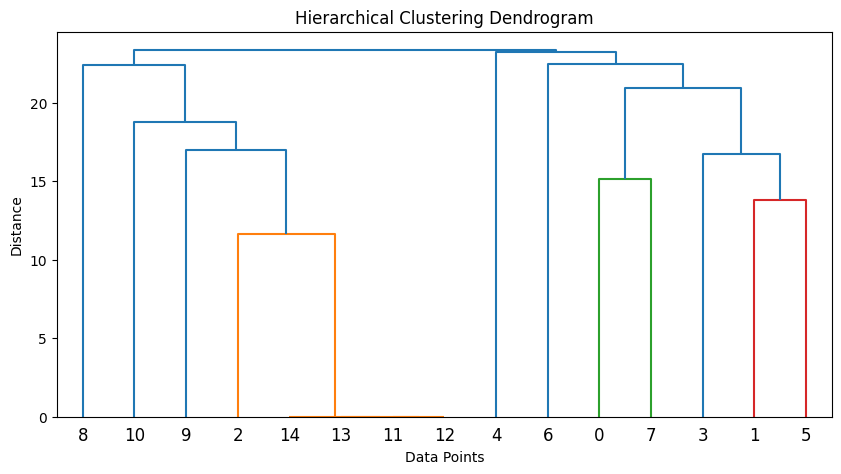

In [32]:
from scipy.cluster.hierarchy import linkage, dendrogram
import numpy as np

# Assuming MD_x is your data matrix
MD_vclust = linkage(np.transpose(MD_x), method='single', metric='euclidean')

# Plot the dendrogram (optional)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
dendrogram(MD_vclust)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

In [38]:
from sklearn.cluster import KMeans
import numpy as np

# Set seed for reproducibility
np.random.seed(1234)

# Assuming MD_x is your data matrix

# Fit KMeans clustering with 2 to 8 clusters and choose the best model based on silhouette score
best_score = -1
best_model = None
best_labels = None

for n_clusters in range(2, 9):
    model = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
    labels = model.fit_predict(MD_x)
    score = silhouette_score(MD_x, labels)
    if score > best_score:
        best_score = score
        best_model = model
        best_labels = labels
# Relabel the cluster assignments
unique_labels = np.unique(best_labels)
new_labels = np.arange(len(unique_labels))
relabel_dict = dict(zip(unique_labels, new_labels))
relabeled_labels = np.vectorize(relabel_dict.get)(best_labels)

# Print the relabeled cluster assignments
print(relabeled_labels)

[4 2 5 ... 5 3 0]


In [42]:
from sklearn.cluster import KMeans
import numpy as np

# Assuming MD_x is your data matrix

# Initialize MD_km28 with an empty dictionary
MD_km28 = {}

# Perform k-means clustering for cluster numbers ranging from 2 to 8
for n_clusters in range(2, 9):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
    kmeans.fit(MD_x)
    MD_km28[str(n_clusters)] = {
        'centers': kmeans.cluster_centers_,
        'size': kmeans.inertia_,
        'crit': kmeans.score(MD_x),
        'labels': kmeans.labels_
    }

# Print the initialized MD_km28 dictionary (optional)
print(MD_km28)

{'2': {'centers': array([[0.9, 1. , 0.1, 0.8, 0.4, 0.9, 0.7, 1. , 0.3, 0.3, 0.1, 0. , 0. ,
        0. , 0. ],
       [0. , 0.8, 0.1, 0.9, 0.7, 0.8, 0.5, 0.1, 0.5, 0.1, 0.5, 0. , 0. ,
        0. , 0. ]]), 'size': 2145.5037269171657, 'crit': -2145.5037269171657, 'labels': array([1, 0, 0, ..., 0, 0, 1], dtype=int32)}, '3': {'centers': array([[0.8, 1. , 0.1, 0.9, 0.6, 0.9, 0.1, 0.9, 0.9, 0.2, 0.2, 0. , 0. ,
        0. , 0. ],
       [0. , 0.8, 0.1, 0.9, 0.7, 0.8, 0.5, 0. , 0.4, 0.1, 0.6, 0. , 0. ,
        0. , 0. ],
       [0.8, 1. , 0.1, 0.8, 0.4, 1. , 0.9, 1. , 0. , 0.3, 0. , 0. , 0. ,
        0. , 0. ]]), 'size': 1818.7176591653915, 'crit': -1818.7176591653915, 'labels': array([1, 0, 0, ..., 0, 2, 1], dtype=int32)}, '4': {'centers': array([[1. , 1. , 0.1, 0.8, 0.4, 1. , 1. , 1. , 0. , 0.4, 0.1, 0. , 0. ,
        0. , 0. ],
       [0. , 0.9, 0.1, 0.9, 0.6, 1. , 0.9, 0.3, 0. , 0.1, 0.3, 0. , 0. ,
        0. , 0. ],
       [0. , 0.7, 0.1, 0.9, 0.7, 0.7, 0.1, 0.1, 0.9, 0.1, 0.7, 0. , 0. ,
 

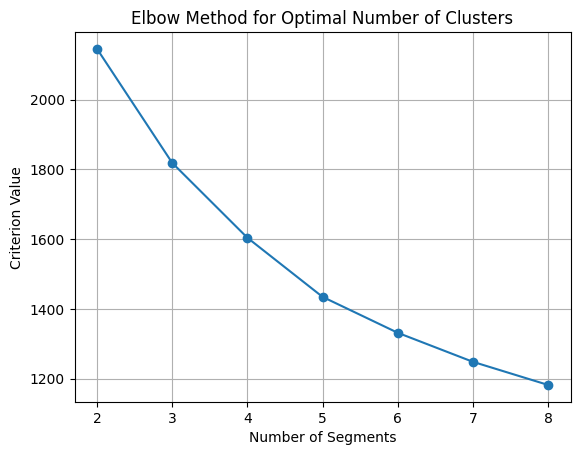

In [44]:
import matplotlib.pyplot as plt

# Assuming MD_km28 is your k-means clustering result

# Extract the criterion values (inertia) for each number of segments
criterion_values = [MD_km28[str(n_clusters)]['size'] for n_clusters in range(2, 9)]

# Plot the number of segments (clusters) on the x-axis
plt.plot(range(2, 9), criterion_values, marker='o', linestyle='-')
plt.xlabel('Number of Segments')
plt.ylabel('Criterion Value')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid(True)
plt.show()


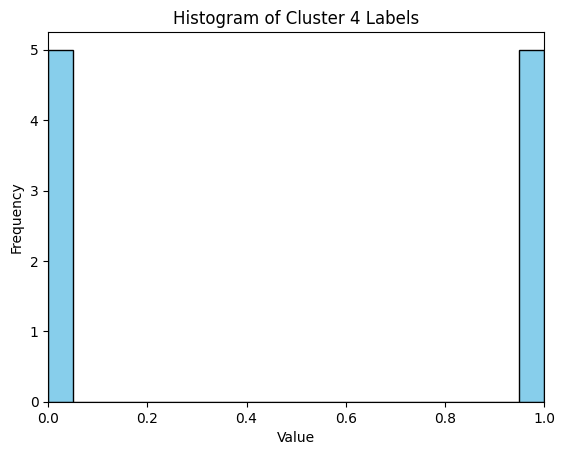

In [46]:
import matplotlib.pyplot as plt

# Assuming MD_k4 is your cluster labels for cluster 4 and MD_x is your data matrix

# Plot the histogram
plt.hist(MD_k4, bins=20, range=(0, 1), color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Cluster 4 Labels')
plt.xlim(0, 1)  # Set x-axis limits
plt.show()


In [47]:
MD_k4 = MD_km28["4"]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Assuming MD_k4 is your cluster labels for cluster 4 and MD_x is your data

# Compute hierarchical clustering
Z = linkage(np.transpose(MD_x), method='complete')  # Use complete linkage method
MD_vclust_order = dendrogram(Z, no_plot=True)['leaves']

# Define your data for the bar chart (cluster frequencies)
unique_labels, label_counts = np.unique(MD_k4, return_counts=True)

# Filter out labels not present in MD_vclust_order
valid_labels = [label for label in unique_labels if label in MD_vclust_order]

# Sort the cluster labels based on hierarchical clustering order
sorted_indices = np.argsort([list(MD_vclust_order).index(label) for label in valid_labels])
sorted_labels = [valid_labels[i] for i in sorted_indices]

# Plot the bar chart
plt.bar(range(len(sorted_labels)), label_counts[np.argsort([list(unique_labels).index(label) for label in valid_labels])], color='skyblue')

# Shade the bars based on hierarchical clustering order
for idx, label in enumerate(sorted_labels):
    if idx % 2 == 0:
        plt.gca().patches[idx].set_facecolor('lightgray')

plt.xlabel('Cluster Label')
plt.ylabel('Frequency')
plt.title('Bar Chart of Cluster Frequencies with Shading')
plt.xticks(range(len(sorted_labels)), sorted_labels)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming MD_k4 contains the cluster labels and MD_pca contains the PCA projections
# You need to replace 'MD_k4' and 'MD_pca' with your actual data
# Also, assume MD_x contains the original data

# Cluster labels from MD_k4
cluster_labels = MD_k4

# Create a PCA object
pca = PCA(n_components=2)

# Fit and transform the original data
MD_pca = pca.fit_transform(MD_x)

# Plot the clustered data projected onto the first two principal components
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustered Data Projected onto PCA')

# Plot principal component axes
plt.quiver(0, 0, pca.components_[0, 0], pca.components_[0, 1], color='red', scale=3, width=0.005)
plt.quiver(0, 0, pca.components_[1, 0], pca.components_[1, 1], color='blue', scale=3, width=0.005)

plt.show()

# To get the principal axes of the PCA, you can directly access the components_ attribute of the PCA object
print("Principal Axes of PCA:")
print(pca.components_)


In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

# Assuming k4 contains the cluster labels and mcdonalds['Like'] contains the 'Like' column
# You need to replace 'k4' and 'mcdonalds['Like']' with your actual data

# Create a DataFrame with cluster labels and 'Like' values
data = {'k4': k4, 'Like': df['Like']}
df = pd.DataFrame(data)

# Create a mosaic plot
mosaic(df, ['k4', 'Like'], title='Mosaic Plot', axes_label=True)

plt.xlabel('Segment Number')
plt.show()


In [ ]:
X=df[['Like','Age','VisitFrequency']]
y = (df['k4'] == 3).astype(int)

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Assuming you have already defined X and y from your dataset
# X should contain the features (Like.n, Age, VisitFrequency, Gender) and y should contain the target variable (factor(k4 == 3))

# Initialize and fit the decision tree classifier
tree = DecisionTreeClassifier()
tree.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(15, 10))  # Adjust the figure size as needed
plot_tree(tree, filled=True, feature_names=X.columns, class_names=["False", "True"])  # Adjust class names if needed
plt.show()
